# Neural Networks Midterm Draft 2
    by Brian Kim

# Overview
In this notebook, we try to integrate the class lectures with the code. We also analyze the synthetic data as a demonstration of attributes for the 4 models.
     1) Import
     2) Pre-processing + Regularization techniques
     3) Models + Analysis

Relevant Websites:
    * http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
    * https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/
Questions obtained from assignment:
    1) Can we include pseudonorms in the reguluarization process? It seems the lower the p, the better feature selection we have.

## First we import our synthetic data.

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import csv
filename = 'midterm_data.csv'
head = ['X1','X2','Class']
fptr = open(filename,'w', newline='')
writer = csv.writer(fptr,delimiter=',')
writer.writerow(head)
    
    
N=100
x0=0.5*np.random.randn(2,N)

fig = plt.figure()  #  axis([-10 10 -10 10]),hold on;
ax0 = fig.add_subplot(1,1,1)
ax0.set_xlim(-10., 10.)
ax0.set_ylim(-10., 10.)

x1=np.zeros((2,N))
x2=np.zeros((2,N))
x3=np.zeros((2,N))

for j in range(N):
   x1[:,j] = x0[:,j] + [-1,1]
   x2[:,j] = x0[:,j] + [2,3]
   x3[:,j] = x0[:,j] + [2,6]
#
#
ax0.plot(x1[0,:],x1[1,:],'r+')
ax0.plot(x2[0,:],x2[1,:],'bo')
ax0.plot(x3[0,:],x3[1,:],'g*')


for j in range(N):
   writer.writerow([x1[0,j],x1[1,j],'1'])
for j in range(N):
   writer.writerow([x2[0,j],x2[1,j],'2'])
for j in range(N):
   writer.writerow([x3[0,j],x3[1,j],'3'])


fptr.close()


## Second, we Pre-process the data generated by the synthetic data above.

    To do this, first we split the data into 70-30 partition (we must also include shuffling for cross-validation, so random_state=1). 

    Let X and y (respectively) denote the training and testing partition, and recall that we must normalize the data by using StandardScaler().Transform(X) function.

    Luckily, we don't have to encode the class label. If we had to encode, refer to chapter 4.



In [13]:
#Preprocessing
import pandas as pd

#Recall that the column 3 in the csv are the test labels.
df = pd.read_csv(filename, names=["X1", "X2", "Class"], header=0)
X = df.iloc[:,0:2]
y = df.iloc[:,2]

#Scale + Shuffle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

#Normalization of our input data.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## We use two plotting subroutines provided by the author.

    The first subroutine from the author accounts for version control, due to the everchanging nature of code.
    Second, is the decision regions mapped via various colors.

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
        

## Tikhonov Regularization

If we wish to add a regulzarization (penalty) term, we can employ the Tikhonov regularization introduced in class. Tikhonov regularization is used in fitting a regression model in the presence of corrupt data: either outliers, or error in the model.  We quote:
    *http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression
    
    
    
"Tikhonov regularization addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$$ \underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2}$$

Here, $\alpha \geq 0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity."


Example code is added below.

In [7]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit ([[0, 0], [0, 0], [1, 1]], [0, .1, 1]) 


reg.coef_

reg.intercept_ 


0.13636363636363641

## L1 Magic
For a sparse dataset $X$, L1 Magic or "Lasso method" consists of a linear model trained with $\ell_1$ prior as regularizer. The cost functional we minimize is:

$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$

The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha||w||_1$ added, where $\alpha$ is a constant and $||w||_1$ is the $\ell_1-norm$ of the parameter vector. L1 Magic or "Lasso method" overcomes the disadvantage of Ridge regression by not only punishing high values of the coefficients β but actually setting them to zero if they are not relevant. Therefore, we might end up with fewer features included in the model than you started with, which is a huge advantage for feature selection.

Below is some exmample code.
http://scikit-learn.org/stable/modules/linear_model.html#lasso



In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])



reg.predict([[1, 1]])

### Perceptrons

    The perceptron is the vanilla NN that seeks to minimize distances with half-planes. However, they will not converge for datasets that are not linearly seperable, which is why they are not widely used in practice.

In [2]:

##########################
#Perceptron


from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)


y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

#plt.plot(np.arange(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
#plt.xlabel('Epochs')
#plt.ylabel('Number of updates')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('x1 [standardized]')
plt.ylabel('x2 [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()
#

NameError: name 'X_train_std' is not defined

### Logistic Regression

    Logistic regression performs well for linearly seperable datasets, and is used frequently in industry due to its ease of implementation. In this model, we add an additional layer of complexitiy to the Perceptron by implementing the sigmoid activation functional for a given dot product <x,w>. 
    
    To account for high non-linearity, we may include a penalty term (regularization term) to the cost functional. See Tchkonov Regularization.

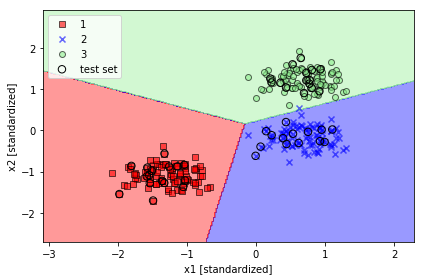

In [16]:
#############
#Logistic
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('x1 [standardized]')
plt.ylabel('x2 [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()



### Support Vector Machines

    Supporjt vector machines are also widely used. Like our perceptron algorithm, we minimize some cost functional. However, in SVM we minimize "margins". See ch 3 pg. 77 for details.
    
    SVM and linear logistic regressions yield similar results. LR tries to maximize the conditional likelihoods of the training data, which makes it more prone to outliers than SVM. On the other hand, LR has the advantage that it is simplier and implemented more easily. Furthermore, LR models can be easily updated, which is attractive when working with streaming data.
    Recall in class that to solve for non-linear datasets, we can implement the kernel trick discussed in class for SVMs

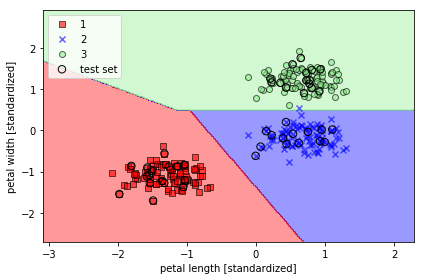

In [17]:
#SVM
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('x1 [standardized]')
plt.ylabel('x2 [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_linear.png', dpi=300)
plt.show()

### Support Vector Machines

    Decision tree models are attractive if we care about interpretability. It tries to maximize "information" by understanding certain notions about information entropy. H
    
    Decision trees can build complex decision boundaries by dividing the feature space into rectangles. However, we have to be careful since the deeper the decision tree, the more complex the decision boundaries become. Since we must be conscious of the overfitting dilemma, we may have to implement a robust adaptive feature (Can someone tell me if there is one of if it's already built into the program?)
    
    

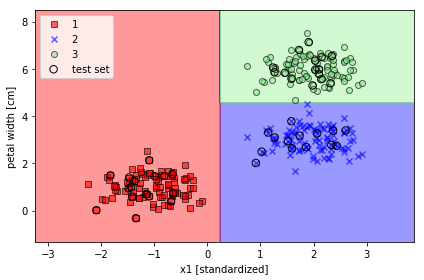

In [18]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('x1 [standardized]')
plt.ylabel('x2 [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/decision_tree_decision.png', dpi=300)
plt.show()

### K-Neighbors

    K-Nearest Neighbors is a nonparametric model that is described as instance-based learning. Models based on instance-based learning are characterized by memorizing the training dataset.
    
    KNN is very susceptible to overfitting and may need regularlization proceedures.

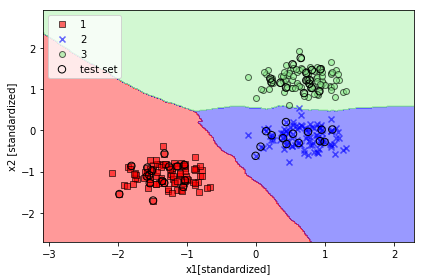

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('x1[standardized]')
plt.ylabel('x2 [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/k_nearest_neighbors.png', dpi=300)
plt.show()